### 라이브러리 선언

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/pima-indians-diabetes.data.csv'
data = pd.read_csv(url)
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. 데이터 분리

In [3]:
featuresData = data.drop(columns=['diabetes'])
labelData = data['diabetes']

trainingData_features,\
testData_features,\
trainingData_label,\
testData_label = train_test_split(featuresData,labelData, test_size=0.2, random_state=1)

In [4]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_label.shape)
print(testData_label.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [5]:
features = list(trainingData_features.select_dtypes(np.number).columns)

In [6]:
features

['pregnancies',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'dpf',
 'age']

### 3. 모델 생성

In [7]:
model = Sequential()
### 4개의 feature 가 행으로 입력됨
#Hidden Layer-1
model.add(Dense(8, activation='relu', input_shape=(len(features),)))
#Hidden Layer-2
model.add(Dense(8, activation='relu'))
#Output layer
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


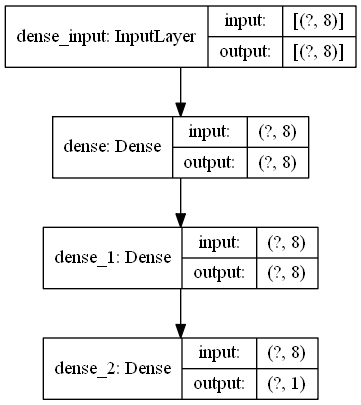

In [8]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_plot.png')

### 4. 모델 컴파일

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 5. 모델 학습

In [10]:
import os
from datetime import datetime

In [11]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

In [12]:
datetime.now().strftime("%Y%m%d_%H%M%S")

logdir = os.path.join("logs_t", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callbacks = [
    
    TensorBoard(
    log_dir = logdir),
    
    ModelCheckpoint(
        "model_b_out.h5", monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

history = model.fit(trainingData_features,
                         trainingData_label,
                         epochs=500,
                         batch_size=32,
                         callbacks=callbacks,
                         validation_split=0.2)

W1014 14:43:04.972123  4552 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 491 samples, validate on 123 samples
Epoch 1/500
 32/491 [>.............................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00001: val_accuracy improved from -inf to 0.63415, saving model to model_b_out.h5
491/491 [==============================] - 0s 592us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 2/500
 32/491 [>.............................] - ETA: 0s - loss: 7.7125 - accuracy: 0.5000
Epoch 00002: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 82us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 3/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00003: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 92us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 4/500
 32/491 [>.............................] - ETA: 0s

 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00029: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 74us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 30/500
 32/491 [>.............................] - ETA: 0s - loss: 2.8922 - accuracy: 0.8125
Epoch 00030: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 135us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 31/500
 32/491 [>.............................] - ETA: 0s - loss: 1.4461 - accuracy: 0.9062
Epoch 00031: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 66us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 32/500
 32/491 [>.............................] - ETA: 0s - loss: 3.8562 - accuracy: 0.7500
Epoch 00032: val_accuracy did not improve from 0.6341

Epoch 58/500
 32/491 [>.............................] - ETA: 0s - loss: 7.7125 - accuracy: 0.5000
Epoch 00058: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 69us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 59/500
 32/491 [>.............................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00059: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 70us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 60/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00060: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 71us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 61/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00061: val_accuracy did not improve

Epoch 87/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00087: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 88/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00088: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 70us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 89/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00089: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 69us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 90/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00090: val_accuracy did not improve

Epoch 116/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00116: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 68us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 117/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00117: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 92us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 118/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00118: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 64us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 119/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00119: val_accuracy did not imp

Epoch 145/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00145: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 67us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 146/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00146: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 64us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 147/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00147: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 148/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00148: val_accuracy did not imp

Epoch 174/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00174: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 74us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 175/500
 32/491 [>.............................] - ETA: 0s - loss: 6.7484 - accuracy: 0.5625
Epoch 00175: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 71us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 176/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00176: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 72us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 177/500
 32/491 [>.............................] - ETA: 0s - loss: 3.3742 - accuracy: 0.7812
Epoch 00177: val_accuracy did not imp

Epoch 203/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00203: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 84us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 204/500
 32/491 [>.............................] - ETA: 0s - loss: 3.8562 - accuracy: 0.7500
Epoch 00204: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 75us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 205/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00205: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 71us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 206/500
 32/491 [>.............................] - ETA: 0s - loss: 3.3742 - accuracy: 0.7812
Epoch 00206: val_accuracy did not imp

Epoch 232/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00232: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 70us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 233/500
 32/491 [>.............................] - ETA: 0s - loss: 3.3742 - accuracy: 0.7812
Epoch 00233: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 89us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 234/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00234: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 235/500
 32/491 [>.............................] - ETA: 0s - loss: 6.2664 - accuracy: 0.5938
Epoch 00235: val_accuracy did not imp

Epoch 261/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00261: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 78us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 262/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00262: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 77us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 263/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00263: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 264/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00264: val_accuracy did not imp

Epoch 290/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00290: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 64us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 291/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00291: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 66us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 292/500
 32/491 [>.............................] - ETA: 0s - loss: 1.9281 - accuracy: 0.8750
Epoch 00292: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 67us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 293/500
 32/491 [>.............................] - ETA: 0s - loss: 6.7484 - accuracy: 0.5625
Epoch 00293: val_accuracy did not imp

Epoch 319/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00319: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 93us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 320/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00320: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 99us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 321/500
 32/491 [>.............................] - ETA: 0s - loss: 7.7125 - accuracy: 0.5000
Epoch 00321: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 91us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 322/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00322: val_accuracy did not imp

Epoch 348/500
 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00348: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 79us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 349/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00349: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 77us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 350/500
 32/491 [>.............................] - ETA: 0s - loss: 3.3742 - accuracy: 0.7812
Epoch 00350: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 78us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 351/500
 32/491 [>.............................] - ETA: 0s - loss: 3.8562 - accuracy: 0.7500
Epoch 00351: val_accuracy did not imp

Epoch 377/500
 32/491 [>.............................] - ETA: 0s - loss: 3.8562 - accuracy: 0.7500
Epoch 00377: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 74us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 378/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00378: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 75us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 379/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00379: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 84us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 380/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00380: val_accuracy did not imp

Epoch 406/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00406: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 89us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 407/500
 32/491 [>.............................] - ETA: 0s - loss: 3.3742 - accuracy: 0.7812
Epoch 00407: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 98us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 408/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00408: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 108us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 409/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00409: val_accuracy did not im

Epoch 435/500
 32/491 [>.............................] - ETA: 0s - loss: 3.8562 - accuracy: 0.7500
Epoch 00435: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 93us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 436/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00436: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 437/500
 32/491 [>.............................] - ETA: 0s - loss: 4.3383 - accuracy: 0.7188
Epoch 00437: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 76us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 438/500
 32/491 [>.............................] - ETA: 0s - loss: 7.2304 - accuracy: 0.5312
Epoch 00438: val_accuracy did not imp

Epoch 464/500
 32/491 [>.............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00464: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 101us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 465/500
 32/491 [>.............................] - ETA: 0s - loss: 4.8203 - accuracy: 0.6875
Epoch 00465: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 92us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 466/500
 32/491 [>.............................] - ETA: 0s - loss: 6.2664 - accuracy: 0.5938
Epoch 00466: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 95us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 467/500
 32/491 [>.............................] - ETA: 0s - loss: 6.7484 - accuracy: 0.5625
Epoch 00467: val_accuracy did not im

 32/491 [>.............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00492: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 112us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 493/500
 32/491 [>.............................] - ETA: 0s - loss: 6.7484 - accuracy: 0.5625
Epoch 00493: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 89us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 494/500
 32/491 [>.............................] - ETA: 0s - loss: 2.8922 - accuracy: 0.8125
Epoch 00494: val_accuracy did not improve from 0.63415
491/491 [==============================] - 0s 87us/sample - loss: 5.2778 - accuracy: 0.6578 - val_loss: 5.6433 - val_accuracy: 0.6341
Epoch 495/500
 32/491 [>.............................] - ETA: 0s - loss: 7.7125 - accuracy: 0.5000
Epoch 00495: val_accuracy did not improve from 0.6

In [13]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,5.277783,0.657841,5.643274,0.634146
1,5.277783,0.657841,5.643274,0.634146
2,5.277783,0.657841,5.643274,0.634146
3,5.277783,0.657841,5.643274,0.634146
4,5.277783,0.657841,5.643274,0.634146
...,...,...,...,...
495,5.277783,0.657841,5.643274,0.634146
496,5.277783,0.657841,5.643274,0.634146
497,5.277783,0.657841,5.643274,0.634146
498,5.277783,0.657841,5.643274,0.634146


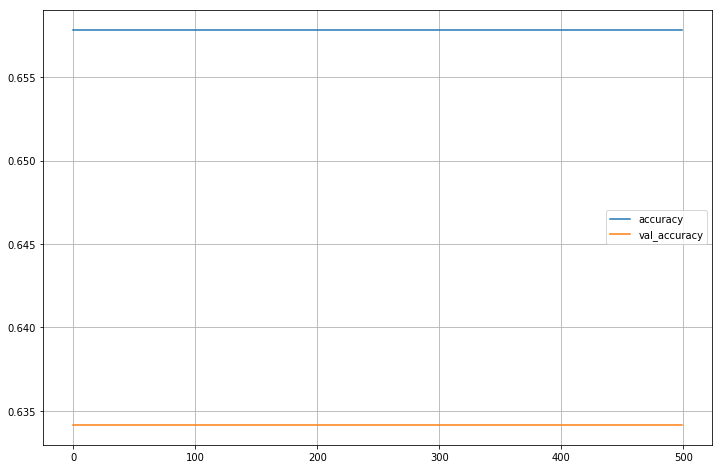

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['accuracy'])
# 검증 데이터의 mse
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [15]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
495,5.277783,0.657841,5.643274,0.634146
496,5.277783,0.657841,5.643274,0.634146
497,5.277783,0.657841,5.643274,0.634146
498,5.277783,0.657841,5.643274,0.634146
499,5.277783,0.657841,5.643274,0.634146


### 6. 모델 추론

In [16]:
import math
# 정확도 추론
model.evaluate(testData_features, testData_label, verbose=1)

W1014 14:43:26.853652  4552 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


154/154 [==============================] - 0s 64us/sample - loss: 5.5089 - accuracy: 0.6429


[5.5089102720285394, 0.64285713]

### 7. 모델 예측

In [17]:
# 가상의 환자 데이터 입력
patient_1 = pd.DataFrame([[0,137,90,35,168,43.1,2.288,33]])

# 모델로 예측하기
prediction = model.predict(patient_1)
prediction

W1014 14:43:26.941449  4552 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([[0.]], dtype=float32)

In [18]:
# 예측결과 출력하기
print(prediction*100)

[[0.]]


### [실습] diabetes 동일 데이터를 활용하여 다음장 학습 종료 후 sigmoid 와 softmax를 활용하여 예측정확도를 비교해보세요.